# Alcuni esercizi su grammatiche e linguaggi

In [ ]:
from liblet import Grammar, ProductionGraph, Derivation

## Un linguaggio non context-free

Un esempio interessante è quello del linguaggio $L = \{a^nb^nc^n \mid n > 0\}$ che, come dovrebbe esservi noto dall'insegnamento di "Linguaggi formali" non è context-free; sapresete convincervi che esso è generato dalla seguente grammatica (context-sensitive)?

In [ ]:
G_anbncn = Grammar.from_string("""
S -> a b c
S -> a S Q
b Q c -> b b c c
c Q -> Q c
""", False)
G_anbncn.P

(S -> a b c, S -> a S Q, b Q c -> b b c c, c Q -> Q c)

Un esempio di derivazione è 

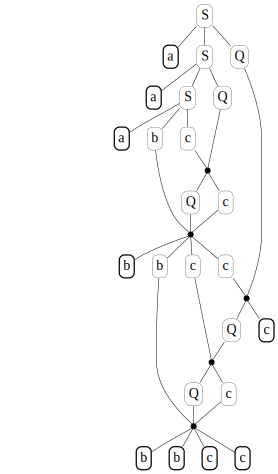

In [ ]:
ProductionGraph(Derivation(G_anbncn).step((
  (1, 0), (1, 1), (0, 2), (3, 4), (2, 3), (3, 6), (3, 5), (2, 4)
)))

## Un esempio di grammatica monotona

È banale scrivere una grammatica context-free per il linguaggio $\{ ww^R \mid w \in \{a, b\}^+\}$, dove $w^R$ è la parola ottenuta invertendo l'ordine delle lettere di $w$.

Sapreste scrivere una grammatica monotona per il linguaggio (non context-free) cosiddetto delle parole ripetute $\{ ww \mid w \in \{a, b\}^+\}$? 

## Migliorare la funzione `produce` per le grammatiche monotone?

La procedura `produce` presentata a lezione è stata resa totale con un trucco
(il parametro `max_steps`); sapreste renderla totale per le grammatiche di tipo 1 o maggiore?

## Igiene nelle CF: l'ordine conta!

* Implementare una versione del *decoratore* `closure`.

* Implementare una versione del metodo `restrict_to`, ossia una funzione
  `clean(G, good)` che data una grammatica `G` e un insieme di   simboli `good`
  restituisca una nuova grammatica ottenuta cancellando da `G` i simboli non in
  `good` e le produzioni in cui figurano.

In [ ]:
G_small = Grammar.from_string("""
S -> A | a
A -> A B
B -> a
C -> a
B -> x
""")

Ad esempio, se invocata su `G_small` e avendo `{'A', 'B', 'S', 'a'}` come insieme di simboli da preservare, la funzione restituisce la grammatica `Grammar(N={A, B, S}, T={a}, P=(S -> A, S -> a, A -> A B, B -> a), S=S)`
  
* Usando tale funzione, mostrare che, dati 
  
        G0 = clean(G, productive(G.T, G))
        G1 = clean(G0, reachable({G0.S}, G0))
      
        G2 = clean(G, reachable({G.S}, G))
        G3 = clean(G2, productive(G2.T, G2))
        
  si ha che `G1` e`G3` sono diverse, ossia che rimuovere prima gli improduttivi e poi 
  gli irraggiungibili, o viceversa, non porta alla stessa grammatica (e solo `G1` è
  una grammatica *propria*).